In [63]:
import geopandas as gp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import math
CALIBRATION_NEEDED = False
pd.set_option('display.max_columns', 85)

In [64]:
df = gp.read_file("track.geojson")
df

,leq_mean,marker-color,accuracy,location_utc,leq_utc,leq_id,bearing,speed,leq_100,leq_125,leq_160,leq_200,leq_250,leq_315,leq_400,leq_500,leq_630,leq_800,leq_1000,leq_1250,leq_1600,leq_2000,leq_2500,leq_3150,leq_4000,leq_5000,leq_6300,leq_8000,leq_10000,leq_12500,leq_16000,geometry
0,57.051598,#F3C683,2.1,1681298304791,1681298305222,34,323.07,0.070002,46.042183,49.452510,51.452700,50.030468,44.044212,43.480705,42.757736,39.096134,38.413110,38.594677,37.153140,35.762050,34.504190,32.232903,30.694542,31.051577,33.290356,38.840870,43.644790,25.476595,24.427479,17.679892,15.787117,POINT Z (38.81234 8.88655 2151.40000)
1,52.682205,#E2F2BF,2.1,1681298305780,1681298306208,35,182.84,0.211036,36.867294,48.136880,44.669792,43.049557,39.461193,39.056507,37.411750,40.068820,40.483227,38.519580,36.821660,35.307980,34.195873,31.498116,29.669480,26.554120,28.523754,27.314693,23.611883,12.353703,10.761398,8.094937,4.116166,POINT Z (38.81232 8.88654 2151.70000)
2,59.968716,#F3C683,2.0,1681298307000,1681298307199,36,199.06,0.376777,47.362885,47.439537,50.979874,51.812380,53.337505,53.224583,50.566936,42.942104,40.083744,39.742733,37.825440,36.502920,36.201700,36.330482,29.621962,30.836842,34.331062,34.423460,20.093952,12.666441,14.331326,7.486393,3.344004,POINT Z (38.81232 8.88654 2152.10000)
3,59.849834,#F3C683,2.0,1681298308000,1681298308181,37,200.66,0.575459,47.258360,50.852535,53.191080,53.756554,52.818320,47.213050,36.752235,36.134243,38.278450,37.328815,34.584972,36.942104,38.344770,37.664720,41.081566,43.661340,38.553555,38.365430,36.797215,36.353096,25.804483,19.244917,13.621429,POINT Z (38.81233 8.88654 2152.20000)
4,88.971985,#430A4A,2.0,1681298309000,1681298309200,38,183.85,0.524502,57.365993,59.657917,62.703590,65.998130,67.978510,69.699390,72.161354,74.472150,76.836430,79.075030,79.095276,77.587580,80.591890,81.860890,79.691570,76.859850,74.290500,70.814610,66.151160,59.565680,54.206310,51.753180,48.012760,POINT Z (38.81233 8.88653 2152.30000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,73.645830,#A11A4D,1.4,1681298737000,1681298737210,466,51.14,0.481780,46.452682,46.145620,49.032680,51.521988,58.819230,63.659570,59.439278,66.519325,59.686960,57.125330,55.694237,65.067820,66.768580,60.342570,61.992546,57.937020,60.140728,53.808353,46.582676,38.724770,27.051080,21.737890,15.249611,POINT Z (38.81498 8.88396 2138.80000)
433,80.129550,#430A4A,1.5,1681298738000,1681298738199,467,54.94,0.559503,46.112850,46.842167,52.309425,53.283460,62.663110,66.480060,62.127148,74.640650,68.479836,62.739822,62.919285,64.071810,67.104866,71.303050,73.386580,60.291920,64.397800,68.815910,52.647594,42.278515,26.947927,19.153280,12.914442,POINT Z (38.81498 8.88397 2139.10000)
434,77.941246,#75085C,1.5,1681298739000,1681298739180,468,29.41,0.634138,41.606228,46.462093,46.522060,48.579823,55.284363,65.300125,60.312157,71.440920,69.622570,64.567120,71.166900,68.267710,62.115685,66.794260,62.022870,63.821440,58.807520,54.023870,49.437294,31.773228,24.589247,18.391035,14.274389,POINT Z (38.81499 8.88397 2139.10000)
435,70.568210,#A11A4D,1.4,1681298740000,1681298740192,469,44.92,0.714434,43.960770,50.140995,53.581516,53.670895,56.806800,58.778236,57.786736,60.796936,59.325596,58.865036,57.730106,62.723843,62.489760,54.145496,56.698833,56.876670,57.230580,51.183760,44.240097,36.669620,27.533249,27.761486,16.074764,POINT Z (38.81500 8.88398 2139.00000)


## calibration

In [65]:
df2 = pd.read_csv("Book1.csv", delimiter=',', header=0)
X = df2['my Phone'].values.reshape(-1, 1)
y = df2['profecinal instrunment'].values
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,)
model = LinearRegression()
model.fit(X_train, y_train)
model2 = Ridge(alpha=0.00001)
model2.fit(X_train, y_train)
score = model.score(X_test, y_test)
score2 = model2.score(X_test, y_test)
model = model if score > score2 else model2

In [66]:
def calibrator(val):
    return model.predict([[(val)]])[0]

calibrator(72)

60.73215515049567

#### changing the time required format

In [67]:
df["leq_utc"] = pd.to_datetime(df['leq_utc'], unit="ms")
df


,leq_mean,marker-color,accuracy,location_utc,leq_utc,leq_id,bearing,speed,leq_100,leq_125,leq_160,leq_200,leq_250,leq_315,leq_400,leq_500,leq_630,leq_800,leq_1000,leq_1250,leq_1600,leq_2000,leq_2500,leq_3150,leq_4000,leq_5000,leq_6300,leq_8000,leq_10000,leq_12500,leq_16000,geometry
0,57.051598,#F3C683,2.1,1681298304791,2023-04-12 11:18:25.222,34,323.07,0.070002,46.042183,49.452510,51.452700,50.030468,44.044212,43.480705,42.757736,39.096134,38.413110,38.594677,37.153140,35.762050,34.504190,32.232903,30.694542,31.051577,33.290356,38.840870,43.644790,25.476595,24.427479,17.679892,15.787117,POINT Z (38.81234 8.88655 2151.40000)
1,52.682205,#E2F2BF,2.1,1681298305780,2023-04-12 11:18:26.208,35,182.84,0.211036,36.867294,48.136880,44.669792,43.049557,39.461193,39.056507,37.411750,40.068820,40.483227,38.519580,36.821660,35.307980,34.195873,31.498116,29.669480,26.554120,28.523754,27.314693,23.611883,12.353703,10.761398,8.094937,4.116166,POINT Z (38.81232 8.88654 2151.70000)
2,59.968716,#F3C683,2.0,1681298307000,2023-04-12 11:18:27.199,36,199.06,0.376777,47.362885,47.439537,50.979874,51.812380,53.337505,53.224583,50.566936,42.942104,40.083744,39.742733,37.825440,36.502920,36.201700,36.330482,29.621962,30.836842,34.331062,34.423460,20.093952,12.666441,14.331326,7.486393,3.344004,POINT Z (38.81232 8.88654 2152.10000)
3,59.849834,#F3C683,2.0,1681298308000,2023-04-12 11:18:28.181,37,200.66,0.575459,47.258360,50.852535,53.191080,53.756554,52.818320,47.213050,36.752235,36.134243,38.278450,37.328815,34.584972,36.942104,38.344770,37.664720,41.081566,43.661340,38.553555,38.365430,36.797215,36.353096,25.804483,19.244917,13.621429,POINT Z (38.81233 8.88654 2152.20000)
4,88.971985,#430A4A,2.0,1681298309000,2023-04-12 11:18:29.200,38,183.85,0.524502,57.365993,59.657917,62.703590,65.998130,67.978510,69.699390,72.161354,74.472150,76.836430,79.075030,79.095276,77.587580,80.591890,81.860890,79.691570,76.859850,74.290500,70.814610,66.151160,59.565680,54.206310,51.753180,48.012760,POINT Z (38.81233 8.88653 2152.30000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,73.645830,#A11A4D,1.4,1681298737000,2023-04-12 11:25:37.210,466,51.14,0.481780,46.452682,46.145620,49.032680,51.521988,58.819230,63.659570,59.439278,66.519325,59.686960,57.125330,55.694237,65.067820,66.768580,60.342570,61.992546,57.937020,60.140728,53.808353,46.582676,38.724770,27.051080,21.737890,15.249611,POINT Z (38.81498 8.88396 2138.80000)
433,80.129550,#430A4A,1.5,1681298738000,2023-04-12 11:25:38.199,467,54.94,0.559503,46.112850,46.842167,52.309425,53.283460,62.663110,66.480060,62.127148,74.640650,68.479836,62.739822,62.919285,64.071810,67.104866,71.303050,73.386580,60.291920,64.397800,68.815910,52.647594,42.278515,26.947927,19.153280,12.914442,POINT Z (38.81498 8.88397 2139.10000)
434,77.941246,#75085C,1.5,1681298739000,2023-04-12 11:25:39.180,468,29.41,0.634138,41.606228,46.462093,46.522060,48.579823,55.284363,65.300125,60.312157,71.440920,69.622570,64.567120,71.166900,68.267710,62.115685,66.794260,62.022870,63.821440,58.807520,54.023870,49.437294,31.773228,24.589247,18.391035,14.274389,POINT Z (38.81499 8.88397 2139.10000)
435,70.568210,#A11A4D,1.4,1681298740000,2023-04-12 11:25:40.192,469,44.92,0.714434,43.960770,50.140995,53.581516,53.670895,56.806800,58.778236,57.786736,60.796936,59.325596,58.865036,57.730106,62.723843,62.489760,54.145496,56.698833,56.876670,57.230580,51.183760,44.240097,36.669620,27.533249,27.761486,16.074764,POINT Z (38.81500 8.88398 2139.00000)


#### renaming the colomon of lequtc to taken_at(the time of sampling )

In [68]:
df.rename(columns={"leq_utc":"Taken_At"}, inplace=True)


#### setting the time as main index for easy analysis

In [69]:
df.set_index("Taken_At" , inplace=True)
df

,leq_mean,marker-color,accuracy,location_utc,leq_id,bearing,speed,leq_100,leq_125,leq_160,leq_200,leq_250,leq_315,leq_400,leq_500,leq_630,leq_800,leq_1000,leq_1250,leq_1600,leq_2000,leq_2500,leq_3150,leq_4000,leq_5000,leq_6300,leq_8000,leq_10000,leq_12500,leq_16000,geometry
Taken_At,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-12 11:18:25.222,57.051598,#F3C683,2.1,1681298304791,34,323.07,0.070002,46.042183,49.452510,51.452700,50.030468,44.044212,43.480705,42.757736,39.096134,38.413110,38.594677,37.153140,35.762050,34.504190,32.232903,30.694542,31.051577,33.290356,38.840870,43.644790,25.476595,24.427479,17.679892,15.787117,POINT Z (38.81234 8.88655 2151.40000)
2023-04-12 11:18:26.208,52.682205,#E2F2BF,2.1,1681298305780,35,182.84,0.211036,36.867294,48.136880,44.669792,43.049557,39.461193,39.056507,37.411750,40.068820,40.483227,38.519580,36.821660,35.307980,34.195873,31.498116,29.669480,26.554120,28.523754,27.314693,23.611883,12.353703,10.761398,8.094937,4.116166,POINT Z (38.81232 8.88654 2151.70000)
2023-04-12 11:18:27.199,59.968716,#F3C683,2.0,1681298307000,36,199.06,0.376777,47.362885,47.439537,50.979874,51.812380,53.337505,53.224583,50.566936,42.942104,40.083744,39.742733,37.825440,36.502920,36.201700,36.330482,29.621962,30.836842,34.331062,34.423460,20.093952,12.666441,14.331326,7.486393,3.344004,POINT Z (38.81232 8.88654 2152.10000)
2023-04-12 11:18:28.181,59.849834,#F3C683,2.0,1681298308000,37,200.66,0.575459,47.258360,50.852535,53.191080,53.756554,52.818320,47.213050,36.752235,36.134243,38.278450,37.328815,34.584972,36.942104,38.344770,37.664720,41.081566,43.661340,38.553555,38.365430,36.797215,36.353096,25.804483,19.244917,13.621429,POINT Z (38.81233 8.88654 2152.20000)
2023-04-12 11:18:29.200,88.971985,#430A4A,2.0,1681298309000,38,183.85,0.524502,57.365993,59.657917,62.703590,65.998130,67.978510,69.699390,72.161354,74.472150,76.836430,79.075030,79.095276,77.587580,80.591890,81.860890,79.691570,76.859850,74.290500,70.814610,66.151160,59.565680,54.206310,51.753180,48.012760,POINT Z (38.81233 8.88653 2152.30000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 11:25:37.210,73.645830,#A11A4D,1.4,1681298737000,466,51.14,0.481780,46.452682,46.145620,49.032680,51.521988,58.819230,63.659570,59.439278,66.519325,59.686960,57.125330,55.694237,65.067820,66.768580,60.342570,61.992546,57.937020,60.140728,53.808353,46.582676,38.724770,27.051080,21.737890,15.249611,POINT Z (38.81498 8.88396 2138.80000)
2023-04-12 11:25:38.199,80.129550,#430A4A,1.5,1681298738000,467,54.94,0.559503,46.112850,46.842167,52.309425,53.283460,62.663110,66.480060,62.127148,74.640650,68.479836,62.739822,62.919285,64.071810,67.104866,71.303050,73.386580,60.291920,64.397800,68.815910,52.647594,42.278515,26.947927,19.153280,12.914442,POINT Z (38.81498 8.88397 2139.10000)
2023-04-12 11:25:39.180,77.941246,#75085C,1.5,1681298739000,468,29.41,0.634138,41.606228,46.462093,46.522060,48.579823,55.284363,65.300125,60.312157,71.440920,69.622570,64.567120,71.166900,68.267710,62.115685,66.794260,62.022870,63.821440,58.807520,54.023870,49.437294,31.773228,24.589247,18.391035,14.274389,POINT Z (38.81499 8.88397 2139.10000)


### removing unnesesery columns and resampling the data with 3s interval (the max of every 3 secound )

In [70]:
af = df.drop(columns=['speed', 'accuracy',  "bearing","geometry" , "marker-color" , "location_utc" , "leq_id"]).resample('3S').max()
af.head(15)


,leq_mean,leq_100,leq_125,leq_160,leq_200,leq_250,leq_315,leq_400,leq_500,leq_630,leq_800,leq_1000,leq_1250,leq_1600,leq_2000,leq_2500,leq_3150,leq_4000,leq_5000,leq_6300,leq_8000,leq_10000,leq_12500,leq_16000
Taken_At,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-12 11:18:24,57.051598,46.042183,49.452510,51.452700,50.030468,44.044212,43.480705,42.757736,40.068820,40.483227,38.594677,37.153140,35.762050,34.504190,32.232903,30.694542,31.051577,33.290356,38.840870,43.644790,25.476595,24.427479,17.679892,15.787117
2023-04-12 11:18:27,88.971985,57.365993,59.657917,62.703590,65.998130,67.978510,69.699390,72.161354,74.472150,76.836430,79.075030,79.095276,77.587580,80.591890,81.860890,79.691570,76.859850,74.290500,70.814610,66.151160,59.565680,54.206310,51.753180,48.012760
2023-04-12 11:18:30,67.954000,54.805317,57.009567,61.116250,60.815660,62.794487,61.110240,57.324070,49.871902,49.430260,41.540768,40.300167,45.385864,50.283188,45.761017,45.187935,36.162834,38.948357,42.849575,42.518635,26.500996,35.059420,25.318474,29.984924
2023-04-12 11:18:33,60.891785,45.353275,48.916780,47.705482,53.036755,52.663773,53.499420,44.694798,45.116913,41.685352,39.438988,38.843983,38.283688,36.930187,38.922443,48.223724,47.067130,53.210037,43.003304,37.774715,23.624655,32.048530,14.230372,24.172466
2023-04-12 11:18:36,61.125736,49.262707,54.796246,53.702427,54.366570,50.747700,44.268500,37.829420,37.591480,38.675045,35.452800,48.392822,47.768280,49.063236,41.061214,41.302567,49.259740,52.863842,44.506230,42.326225,26.770374,29.515339,13.359858,15.961723
2023-04-12 11:18:39,67.992325,47.117397,54.258360,52.384583,55.641632,46.098927,48.824250,41.382040,38.173668,49.105510,42.343636,41.778595,51.402462,50.360622,41.476990,52.843170,60.880020,62.801193,60.972350,56.563700,46.345764,39.610878,31.764761,38.299810
2023-04-12 11:18:42,60.211025,47.582928,48.152720,47.955880,46.688380,43.309770,39.495354,49.295013,42.999330,53.746254,38.752216,37.860413,51.149437,52.817127,52.719894,49.723053,38.031593,36.344982,38.464474,52.533566,21.649673,47.155075,21.948633,25.930288
2023-04-12 11:18:45,67.409150,54.965153,54.773575,57.528190,54.793860,54.803493,60.304623,61.510162,55.041600,58.967236,48.985620,38.227150,52.311590,52.563137,50.706207,44.710514,47.143852,47.212320,51.128807,36.998035,25.745996,14.335387,9.788422,3.991046
2023-04-12 11:18:48,70.251600,57.022747,61.371660,63.568844,61.159210,62.953480,59.827614,57.297043,53.734634,53.992530,61.686653,59.376522,61.082966,55.454220,56.118180,57.223990,57.452763,51.464912,51.979460,49.420506,38.299076,37.061626,25.441744,24.113297


### calibirator in action !!! IF ONLY NEEDED apply this 

In [71]:
if CALIBRATION_NEEDED:
    for x in af:
        af[x] = af[x].apply(calibrator)
af

,leq_mean,leq_100,leq_125,leq_160,leq_200,leq_250,leq_315,leq_400,leq_500,leq_630,leq_800,leq_1000,leq_1250,leq_1600,leq_2000,leq_2500,leq_3150,leq_4000,leq_5000,leq_6300,leq_8000,leq_10000,leq_12500,leq_16000
Taken_At,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-12 11:18:24,57.051598,46.042183,49.452510,51.452700,50.030468,44.044212,43.480705,42.757736,40.068820,40.483227,38.594677,37.153140,35.762050,34.504190,32.232903,30.694542,31.051577,33.290356,38.840870,43.644790,25.476595,24.427479,17.679892,15.787117
2023-04-12 11:18:27,88.971985,57.365993,59.657917,62.703590,65.998130,67.978510,69.699390,72.161354,74.472150,76.836430,79.075030,79.095276,77.587580,80.591890,81.860890,79.691570,76.859850,74.290500,70.814610,66.151160,59.565680,54.206310,51.753180,48.012760
2023-04-12 11:18:30,67.954000,54.805317,57.009567,61.116250,60.815660,62.794487,61.110240,57.324070,49.871902,49.430260,41.540768,40.300167,45.385864,50.283188,45.761017,45.187935,36.162834,38.948357,42.849575,42.518635,26.500996,35.059420,25.318474,29.984924
2023-04-12 11:18:33,60.891785,45.353275,48.916780,47.705482,53.036755,52.663773,53.499420,44.694798,45.116913,41.685352,39.438988,38.843983,38.283688,36.930187,38.922443,48.223724,47.067130,53.210037,43.003304,37.774715,23.624655,32.048530,14.230372,24.172466
2023-04-12 11:18:36,61.125736,49.262707,54.796246,53.702427,54.366570,50.747700,44.268500,37.829420,37.591480,38.675045,35.452800,48.392822,47.768280,49.063236,41.061214,41.302567,49.259740,52.863842,44.506230,42.326225,26.770374,29.515339,13.359858,15.961723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 11:25:27,75.061950,42.898950,46.914173,44.863970,48.504970,53.742043,48.800900,68.562760,67.692154,68.969475,70.168240,59.223900,57.639736,59.504010,54.421196,58.811077,60.430992,54.875380,60.981260,62.714350,48.463104,29.787678,17.395298,13.168529
2023-04-12 11:25:30,78.399190,49.552080,52.014920,49.872460,57.846127,54.059948,62.171055,71.352530,65.196500,73.041710,65.500280,69.822200,65.770164,69.015710,68.645810,68.206924,69.776436,69.508810,70.564285,67.176800,61.057720,53.243755,48.475037,39.422848
2023-04-12 11:25:33,76.564910,44.117210,48.908060,51.565174,56.878185,66.731610,65.941480,67.698800,69.700950,67.071655,58.949036,67.173706,68.024920,64.495544,61.628895,65.934166,63.940254,62.614720,64.075806,59.917050,46.404053,39.821396,33.220314,28.797380


<Axes: xlabel='Taken_At'>

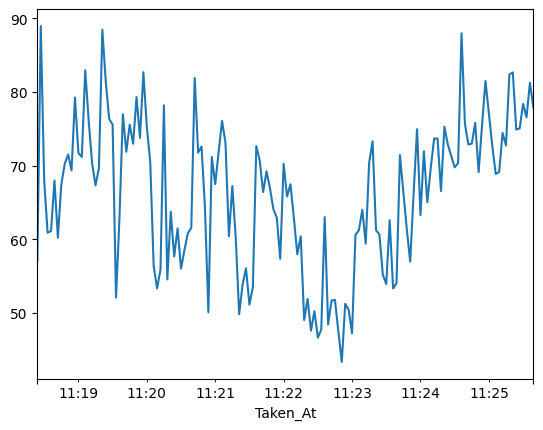

In [72]:
af["leq_mean"].plot()

#### checking the corolation of each frequency with the mean dB

In [73]:
af.corr()["leq_mean"]

leq_mean     1.000000
leq_100      0.710304
leq_125      0.714303
leq_160      0.733011
leq_200      0.788860
leq_250      0.826769
leq_315      0.874343
leq_400      0.878150
leq_500      0.904675
leq_630      0.875592
leq_800      0.767890
leq_1000     0.687351
leq_1250     0.673737
leq_1600     0.666386
leq_2000     0.642187
leq_2500     0.645393
leq_3150     0.573954
leq_4000     0.547370
leq_5000     0.570259
leq_6300     0.512630
leq_8000     0.460286
leq_10000    0.413038
leq_12500    0.456870
leq_16000    0.445767
Name: leq_mean, dtype: float64

<Axes: >

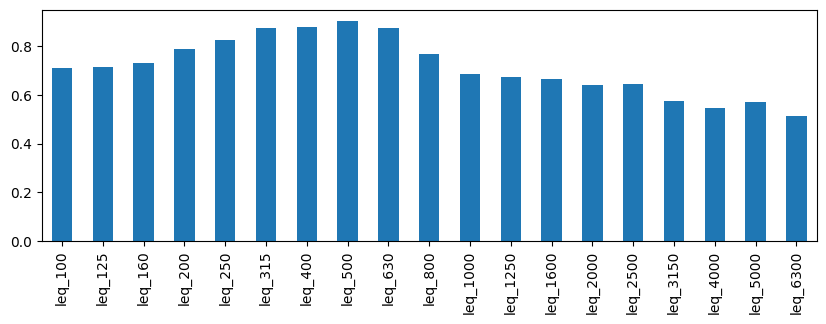

In [74]:
af.corr()["leq_mean"].iloc[1:20].plot(kind="bar", figsize=(10,3))

In [75]:
l10Time = (af.index.max() - af.index.min()) * 0.1
l90Time = (af.index.max() - af.index.min()) * 0.9


In [76]:
L10position = int((l10Time.total_seconds()) / 3)
L90position = int((l90Time.total_seconds()) / 3)
L10position

14

In [77]:
l10 = pd.DataFrame()
freq = []
val = []
for x in af.loc[ : , "leq_mean":"leq_16000" ]:
    val.append(af[x].sort_values(ascending = False).iloc[L10position])
    freq.append(x)
l10["freq"] = freq
l10["dB"] = val
l10.set_index("freq" , inplace=True)
l10

,dB
freq,
leq_mean,78.200830
leq_100,57.626920
leq_125,63.023800
leq_160,65.251920
leq_200,66.384820
leq_250,68.966156
leq_315,69.545740
leq_400,69.454220
leq_500,68.984850


<Axes: xlabel='freq'>

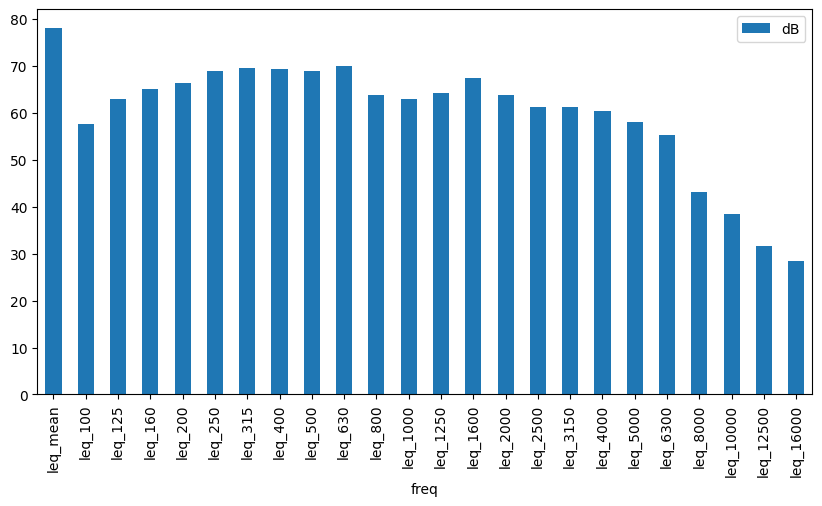

In [78]:
l10.plot(kind = "bar" , figsize=[10,5])

In [79]:

l90 = pd.DataFrame()
freq = []
val = []
for x in af.loc[ : , "leq_mean":"leq_16000" ]:
    val.append(af[x].sort_values(ascending = False).iloc[L90position])
    freq.append(x)
l90["freq"] = freq
l90["dB"] = val
l90.set_index("freq" , inplace=True)
l90

,dB
freq,
leq_mean,51.772156
leq_100,28.106533
leq_125,29.386786
leq_160,30.234060
leq_200,29.706839
leq_250,31.530922
leq_315,34.550682
leq_400,34.197006
leq_500,34.869260


<Axes: xlabel='freq'>

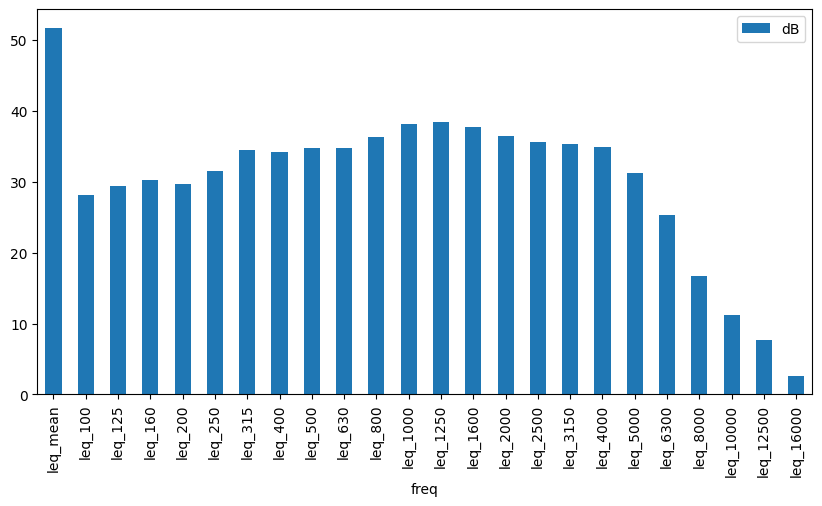

In [80]:
l90.plot(kind="bar", figsize=[10,5])

<Axes: xlabel='Taken_At'>

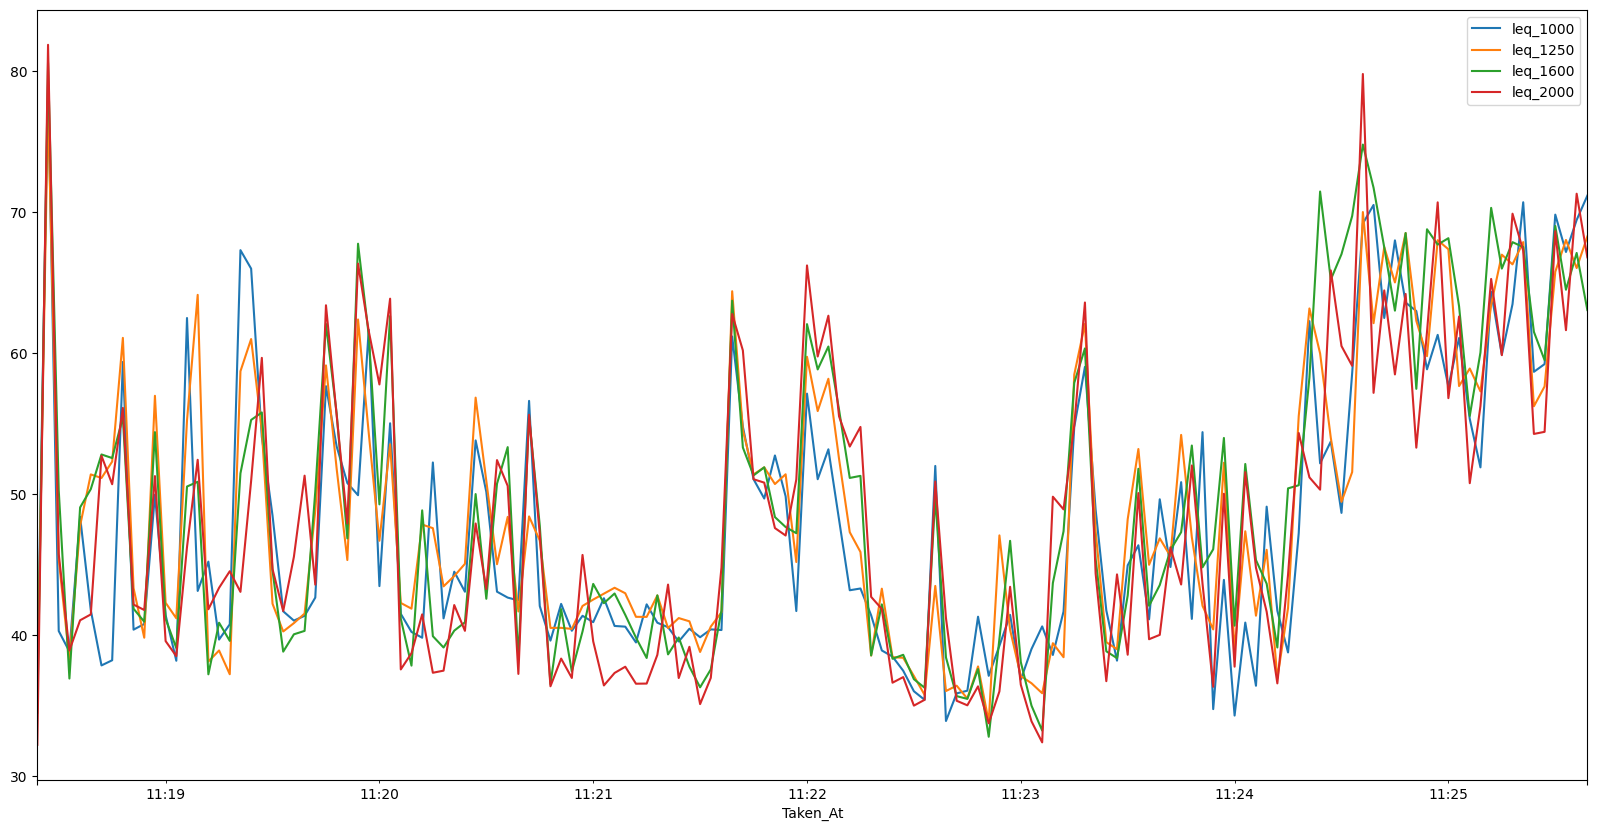

In [81]:
af.loc[ : ,"leq_1000":"leq_2000"].plot(figsize = (20,10))

In [82]:
change = af.index.max() - af.index.min()
totla_sec = change.total_seconds()

## Calculating Leq

In [83]:
def Leq_finder (arr , time , t_totla):
    totoal = 0
    sum = 0
    for x in arr:
        sum += 10 ** (x/10)
    totoal = 10 * math.log10(sum * time/t_totla)
    return totoal

In [84]:
def bandwidth_freq_leq_finder (df):
    freq = []
    value = []
    for x in df:
        freq.append(x)
        value.append(Leq_finder(df[x] , 3 , totla_sec))
    
    Leq = pd.DataFrame()
    Leq["frequency"] = freq
    Leq["value"] = value
    return Leq



In [85]:
Leq = bandwidth_freq_leq_finder(af)
Leq.set_index("frequency" , inplace=True)
Leq

,value
frequency,
leq_mean,75.475904
leq_100,53.817650
leq_125,59.087851
leq_160,61.712546
leq_200,63.126608
leq_250,65.362633
leq_315,65.393483
leq_400,65.587448
leq_500,64.785485


<Axes: xlabel='frequency'>

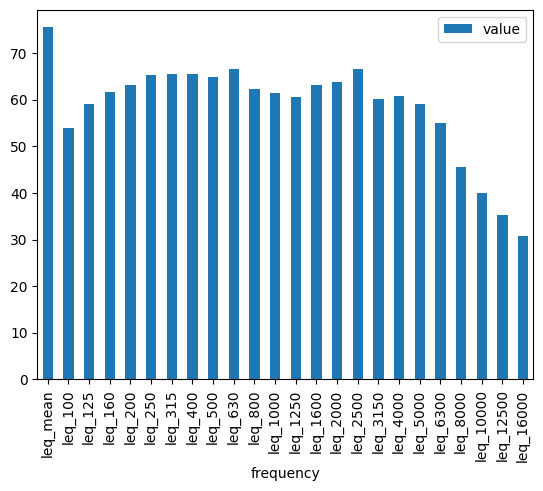

In [86]:
Leq.plot(kind = "bar")